# Question D9

*Question*: Considering the ML-enabled system projects in which you participated, what is the average team size?

*Answer Type*: Single Option

*Options*: [1-5 members, 6-10 members, 11-20 members, 20-50 members, 50+ members]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In this research, we conservatively considered those who fully completed the survey. So, we discarded suspended submissions.

In [3]:
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

### Basic Analysis

In [4]:
dataframe_obj.df['D9_ML_Project_Team_Size'].head()

0               0
1    6-10 members
2    6-10 members
3    6-10 members
4     1-5 members
Name: D9_ML_Project_Team_Size, dtype: object

In [5]:
# mapping of old labels to new one
d9_rename_mapping = {
    '1-5 members': '1-5',
    '6-10 members': '6-10',
    '11-20 members': '11-20',
    '20-50 members': '20-50',
    '50+ members': '50+'
}

In [6]:
# update values in D9 column
dataframe_obj.df['D9_ML_Project_Team_Size'] = rename_values(rename_mapping=d9_rename_mapping,  
                                            values=list(dataframe_obj.df['D9_ML_Project_Team_Size']))

In [7]:
# cleaning data
dataframe_obj.remove_value_from_df('0','D9_ML_Project_Team_Size')

In [8]:
# barplot data
indexes = list(dataframe_obj.df['D9_ML_Project_Team_Size'].value_counts().index)
values = list(dataframe_obj.df['D9_ML_Project_Team_Size'].value_counts())

In [9]:
# plot object
d9_plot = PlotUtils(pd.DataFrame(
    data={'Team Size': indexes, 'Answers': values}
))

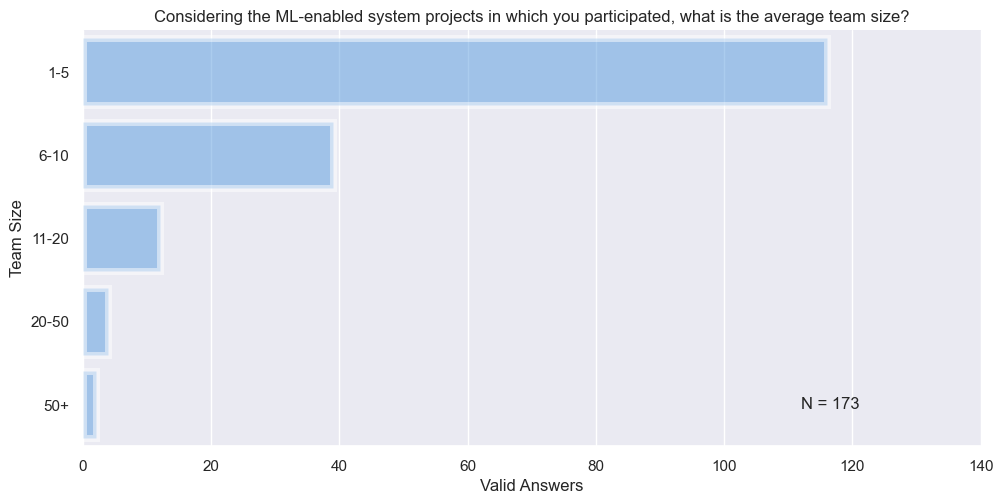

In [10]:
total_answers = 'N = ' + str(len(list(dataframe_obj.df['D9_ML_Project_Team_Size'])))
total_answers_int = len(list(dataframe_obj.df['D9_ML_Project_Team_Size']))

d9_plot.single_barplot(x_axis="Answers", y_axis="Team Size", 
                       title="Considering the ML-enabled system projects in which you participated, what is the average team size?",
                       x_label="Valid Answers", y_label="Team Size", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

### Bootstrapping Analysis

In [11]:
valid_options_list = list(dataframe_obj.df['D9_ML_Project_Team_Size'].unique())
valid_answers_list = list(dataframe_obj.df['D9_ML_Project_Team_Size'])

In [12]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [13]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping('single')

In [14]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']

In [15]:
values = [100 * v for v in values]

In [16]:
# plot object for bootstrapped data
d9_boot_plot = PlotUtils(pd.DataFrame(
    data={'Team Size': indexes, 'Value': values}
).sort_values(by=['Value'], ascending=False))

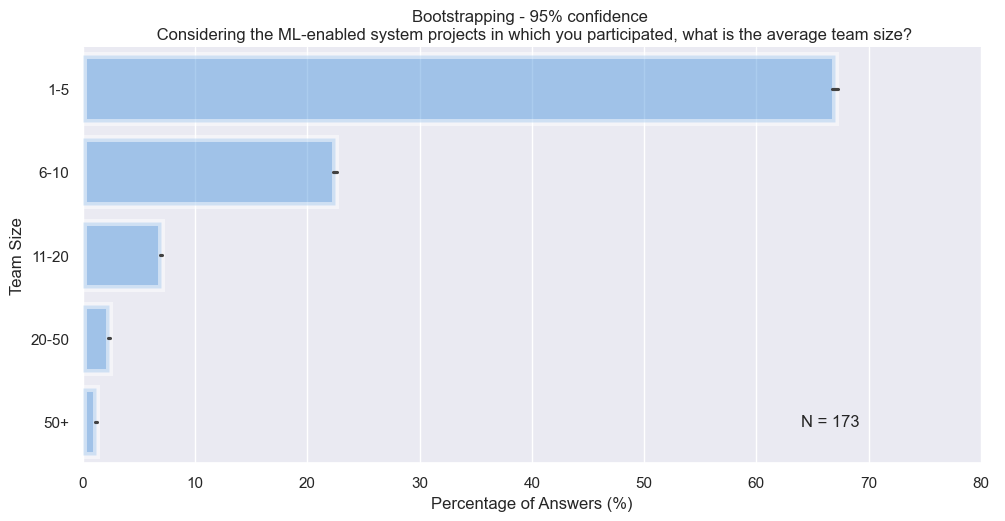

In [17]:
d9_boot_plot.single_barplot(x_axis="Value", y_axis="Team Size", 
                       title="Bootstrapping - 95% confidence \n Considering the ML-enabled system projects in which you participated, what is the average team size?",
                       x_label="Percentage of Answers (%)", y_label="Team Size", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

In [18]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
6-10:(0.2228679732519697, 0.22490173410404626, 0.22693549495612284)
1-5:(0.667668230020978, 0.6699884393063584, 0.6723086485917389)
50+:(0.011175882162412446, 0.011710982658959536, 0.012246083155506626)
11-20:(0.06874358032254864, 0.069878612716763, 0.07101364511097737)
20-50:(0.022800508401084798, 0.02352023121387283, 0.024239954026660866)


In [19]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
6-10:: P = 22.49 [22.287, 22.694]
1-5:: P = 66.999 [66.767, 67.231]
50+:: P = 1.171 [1.118, 1.225]
11-20:: P = 6.988 [6.874, 7.101]
20-50:: P = 2.352 [2.28, 2.424]
